###  Este notebook trata de previsao de valores, usando simulacoes de Monte Carlo.

### **Intervalo de tempo** = periodo onde se deseja ter as previsoes, as quais sao feitas de forma diaria, incremental ou sequencial. O valor predito para o dia posterior depende do que se teve no dia anterior, por exemplo.
### **Simulacao** = para um mesmo intervalo de tempo, considerar fatores influentes específicos, que podem variar de forma aleatoria ou seguindo uma distribuicao normal.

#### Podemos ter varios cenarios, que decorrem das simulacoes, para um mesmo periodo de tempo, como um ano ou conjunto de meses.

In [ ]:
## importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math

In [ ]:
# plotagem de uma figura com os resultados
# a = estrutura de dados com os resultados
# tempo = intervalo de tempo que se considera na previsao
def plotg (a,tempo):
  plt.figure(figsize=(10, 4))
  plt.plot(tempo, a, color='blue', alpha=0.1, label='Predicao')  # Todas as simulacoes.
  plt.title('Predicao com Monte Carlo -- aleatoriedade de Brown')
  plt.xlabel('Tempo - em dias ')
  plt.ylabel('Valor Predito')
  plt.grid(True)

In [ ]:
# plotagem de uma figura com os valores medios
# a = estrutura com os resultados
def plotgm(a,time):
  # a = serie com os valores preditos
  # time = intervalo de tempo onde valem as predicoes.
  plt.figure(figsize=(10, 4))
  plt.plot(time, a.T.mean(axis=0), color='red', label='Media', linewidth=2)
  plt.legend()
  plt.xlabel('Tempo - em dias ')
  plt.ylabel('Valor Predito')
  plt.title('Predicao com Monte Carlo -- aleatoriedade de Brown')
  plt.grid(True)
  plt.show()

In [ ]:
# Parametros tecnicos - entidades que nao se alteram na programacao.
S0 = 100      # Valor inicial da serie ou assunto a ser previsto
mu = 0.05     # media historica ou tendencia basica
sigma = 0.2   # variabilidade historica
T = 252         # Horizonte ou intervalo de tempo -- 1 ano, que tem 252 dias uteis
dt = 0.01   # Incremento de tempo -- um centésimo do ano de trabalho util
N = int(T / dt)  # Numero de iteracoes no tempo
M = 1000     # Numero de simulacoes

In [ ]:
N

25200

In [ ]:
# Variaveis para armazenar os resultados
results = np.ones((N, M)) # colocar valores 1.0 na matriz de resultados (valores iniciais)
tempo = np.linspace(0, T, N) # espaco temporal para fazer as predicoes

In [ ]:
# exemplos de itens da variavel que recebera os resultados
results[0,0], results[10,5], results[5,10], results[15,30]

(1.0, 1.0, 1.0, 1.0)

In [ ]:
results.shape # forma da variavel (linhas e colunas)

(25200, 1000)

##### cumsum() = funcao para acumular uma soma

In [ ]:
# Gerar as diversas simulacoes (Algoritmo de Monte Carlo).
# As simulacoes serao feitas para o intervalo de tempo total
for m in range(M):
    # para saber como se evolui, coloque M com valor baixo e veja os prints
    # Gerar os fatores aleatorios, a partir de uma distribuicao normal
    W = np.random.standard_normal(size = N)  # Valores entre 0 e 1, gerados aleatoriamente
    W = np.cumsum(W) * np.sqrt(dt)

# Simulacao com modelo Browniano
    S = S0 * np.exp((mu - 0.5 * sigma**2) * tempo + sigma * W)
    results[:,m] = S # pegar todos os valores preditos, para cada cenário ou simulacao
    # print(len(W),W)
    # print(f'S{m} igual a =',S)
    # print(results)

In [ ]:
# para os dias entre 10 e 15, no cenario 3, como fica results?
new_var = results[10:15,3]
new_var

array([98.20374501, 97.87944783, 96.7167343 , 98.25449198, 97.528167  ])

In [ ]:
# para os dois ultimos dias, do cenario 3, como fica results?
new_var = results[-3:-1,3]
new_var

array([42659653.89397264, 42412679.88178805])

In [ ]:
# para os dois ultimos dias, do cenario 4, como fica results?
new_var = results[-3:-1,4]
new_var

array([9411862.86081149, 9328528.39722622])

Duracao em segundos = 1.862


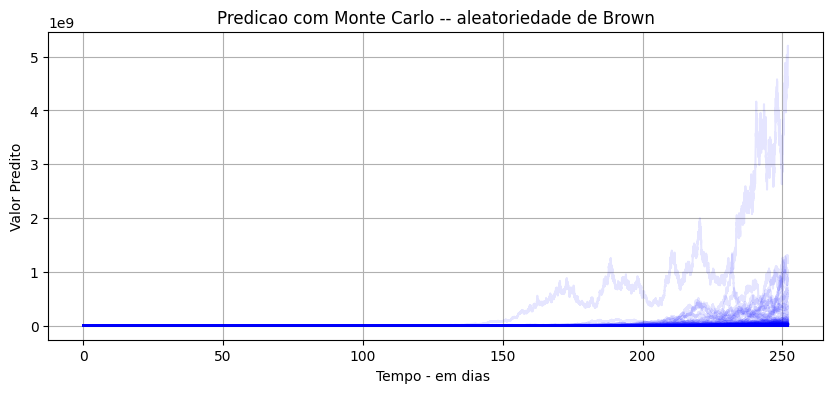

In [ ]:
start = time.time()
plotg(results,tempo)
stop = time.time()
duracao = stop - start
duracao = round(duracao,3)
print(f'Duracao em segundos = {duracao}')

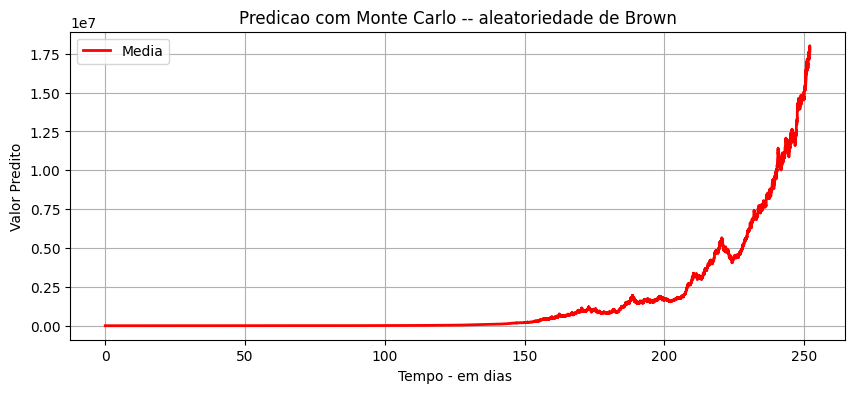

In [ ]:
plotgm(results,tempo)

In [ ]:
# Analise dos valores mais para o final do intervalo de tempom
fim_prices = results[:, -1]  # valores finais, proximos de T
med_fim_price = np.mean(fim_prices)
std_fim_price = np.std(fim_prices)

print(f'Media do valor final: {med_fim_price:.2f}')
print(f'Desvio-padrao do valor final: {std_fim_price:.2f}')
p = round(std_fim_price/med_fim_price)
print(f'Razao entre o desvio-padrao e a media: {p},2')


Media do valor final: 136535.27
Desvio-padrao do valor final: 334376.52
Razao entre o desvio-padrao e a media: 2,2
